In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pgscen.iso.ercot import create_day_ahead_wind_scenario

In [2]:
ls ../data/Wind/NREL/Actual/wind_actual_1h_site_2017_2018_utc.csv

../data/Wind/NREL/Actual/wind_actual_1h_site_2017_2018_utc.csv


In [3]:
wind_site_actual_df = pd.read_csv('../data/Wind/NREL/Actual/wind_actual_1h_site_2017_2018_utc.csv',
                             parse_dates=['Time'],index_col='Time')

wind_site_forecast_df = pd.read_csv('../data/Wind/NREL/Day-ahead/PF/wind_day_ahead_forecast_site_2018_utc.csv',
                             parse_dates=['Issue_time','Forecast_time'])

wind_meta_df = pd.read_excel('../data/MetaData/wind_meta.xlsx')

wind_site_list = wind_site_actual_df.columns.tolist()

In [4]:
nscen = 1000
scenario_start_time = pd.to_datetime('2018-07-01 06:00:00',utc=True)
scen_dir = '/Users/xy3134/Research/PERFORM/Data/GEMINI_scenario/test/'

In [5]:
wind_site_hist_actual_df = wind_site_actual_df[wind_site_actual_df.index<scenario_start_time]
wind_site_hist_forecast_df = wind_site_forecast_df[wind_site_forecast_df['Forecast_time']<scenario_start_time]

wind_site_future_actual_df = wind_site_actual_df[wind_site_actual_df.index>=scenario_start_time]
wind_site_future_forecast_df = wind_site_forecast_df[wind_site_forecast_df['Forecast_time']>=scenario_start_time]

In [6]:
md,gen = create_day_ahead_wind_scenario(nscen,scenario_start_time,wind_meta_df,wind_site_list,wind_site_hist_actual_df,
            wind_site_hist_forecast_df,wind_site_future_actual_df,wind_site_future_forecast_df,scen_dir,
            return_model=True,return_generator=True)

/Users/xy3134/Research/PERFORM/SoftwareDev/new/PGscen/pgscen/generator.py:76: RuntimeWarning: using 70 data points to fit GPD for asset Changing Winds horizon 19, result can be unreliable
  warnings.warn(f'using {len(data)} data points to fit GPD for asset {asset} horizon {horizon}, result can be unreliable',RuntimeWarning)
/Users/xy3134/Research/PERFORM/SoftwareDev/new/PGscen/pgscen/generator.py:76: RuntimeWarning: using 86 data points to fit GPD for asset Desert Sky repower horizon 18, result can be unreliable
  warnings.warn(f'using {len(data)} data points to fit GPD for asset {asset} horizon {horizon}, result can be unreliable',RuntimeWarning)
/Users/xy3134/Research/PERFORM/SoftwareDev/new/PGscen/pgscen/generator.py:76: RuntimeWarning: using 75 data points to fit GPD for asset Desert Sky repower horizon 19, result can be unreliable
  warnings.warn(f'using {len(data)} data points to fit GPD for asset {asset} horizon {horizon}, result can be unreliable',RuntimeWarning)
/Users/xy3134/

(array([  2.,   3.,   3.,   7.,  22.,  49.,  66., 262., 339., 247.]),
 array([ 66.67346594,  71.96925299,  77.26504004,  82.56082709,
         87.85661414,  93.15240119,  98.44818824, 103.74397529,
        109.03976234, 114.33554939, 119.63133644]),
 <BarContainer object of 10 artists>)

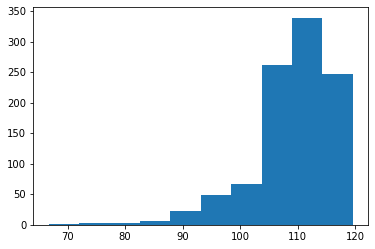

In [12]:
plt.hist(gen.scen_dict['Century Oak Wind']['0600'])

In [9]:
df = pd.read_csv('/Users/xy3134/Research/PERFORM/Data/GEMINI_scenario/test/20180701/wind/Wilson_Ranch.csv')

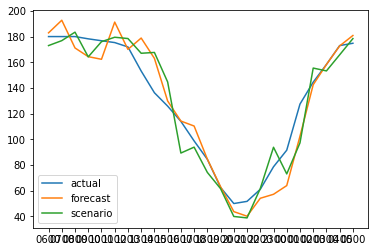

In [24]:
idx = np.random.randint(1000)
plt.plot(df.iloc[0,2:],label='actual')
plt.plot(df.iloc[1,2:],label='forecast')
plt.plot(df.iloc[idx,2:],label='scenario')
plt.legend()

(array([  1.,   0.,   0.,   1.,   1.,   1.,   0.,   2.,   0.,   0.,   4.,
          1.,   1.,   2.,   5.,   6.,   7.,  21.,  11.,  28.,  40.,  49.,
        152., 132.,  92., 107., 109.,  87.,  69.,  71.]),
 array([116.19504603, 118.64575611, 121.09646618, 123.54717626,
        125.99788634, 128.44859641, 130.89930649, 133.35001656,
        135.80072664, 138.25143671, 140.70214679, 143.15285686,
        145.60356694, 148.05427702, 150.50498709, 152.95569717,
        155.40640724, 157.85711732, 160.30782739, 162.75853747,
        165.20924754, 167.65995762, 170.1106677 , 172.56137777,
        175.01208785, 177.46279792, 179.913508  , 182.36421807,
        184.81492815, 187.26563822, 189.7163483 ]),
 <BarContainer object of 30 artists>)

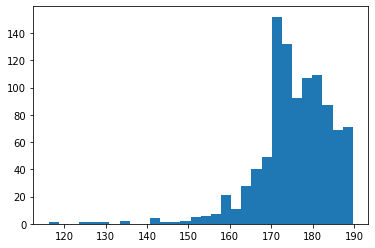

In [27]:
plt.hist(df.iloc[2:,:]['0600'],bins=30)